### Preprocessing 

In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [20]:
class eda_diab:
    def _init_(self,df,X,Y):
        self.df = df
        self.X = X
        self.Y = Y
    def pie(self,df,X,Y):
        df_1 = px.data.tips()
        fig = px.pie(df, values=[Y.loc[Y == 1].count(), Y.loc[Y == 0].count()], names=['Sick','Not Sick'], color_discrete_sequence=px.colors.sequential.RdBu)
        fig.show()
    def group_hist(self,df,X,Y):
        df.hist(bins=75, figsize=(20,15))
        plt.show()
    def box_plots_tot(self,X):
        fig = go.Figure()
        for i in range (len(X.columns)):
            fig.add_trace(go.Box(
                y=list(X.columns[i]),
                name=X.columns[i],
                jitter=0.5,
                boxpoints='all'
                ))           
        fig.update_layout(
            boxmode='group'
        )
        fig.update_traces(width=0.5)
        fig.show()
    def box_plots_1(self,X,Y): ###Sick Class(1)
        fig = go.Figure()
        for i in range (len(X.columns)):
            fig.add_trace(go.Box(
                y=list(X.columns[i]),
                x=np.array(Y),
                name=X.columns[i],
                jitter=0.5,
                boxpoints='all'
                ))
            
        fig.update_layout(
            boxmode='group'
        )
        # fig.update_traces(width=0.5)
        fig.show()
    def pca_viz(self,df,X,Y):
        pca = PCA(n_components = 2)
        X_reduced = pca.fit_transform(X)
        X_reduced = pd.DataFrame(X_reduced)
        X_reduced.columns = ['PC1', 'PC2']
        df_reduced = pd.concat([X_reduced,Y], axis = 1)
        df['Outcome_label'] = np.zeros(len(df))
        df['Outcome_label'] = np.where((df['Outcome'] == 0) ,'Healthy', df['Outcome_label'])
        df['Outcome_label'] = np.where((df['Outcome'] == 1),'Sick', df['Outcome_label'])
        fig = px.scatter(X_reduced,x='PC1', y='PC2', color=df['Outcome_label'])
        features = ['PC1','PC2']
        dimensions=features
        Xlabel = 'PC1'
        fig.show()


In [12]:
df =  pd.read_csv('diabetes.csv')
X = df.drop(columns = ['Outcome'])
Y = df['Outcome']

From the Outcome variable 65.1% is healthy and 34.9% is Sick as can be seen from the pie chart below

In [13]:
pie_ = eda_diab()
pie_.pie(df,X,Y)

To explore more, grouped histogram is shown below.

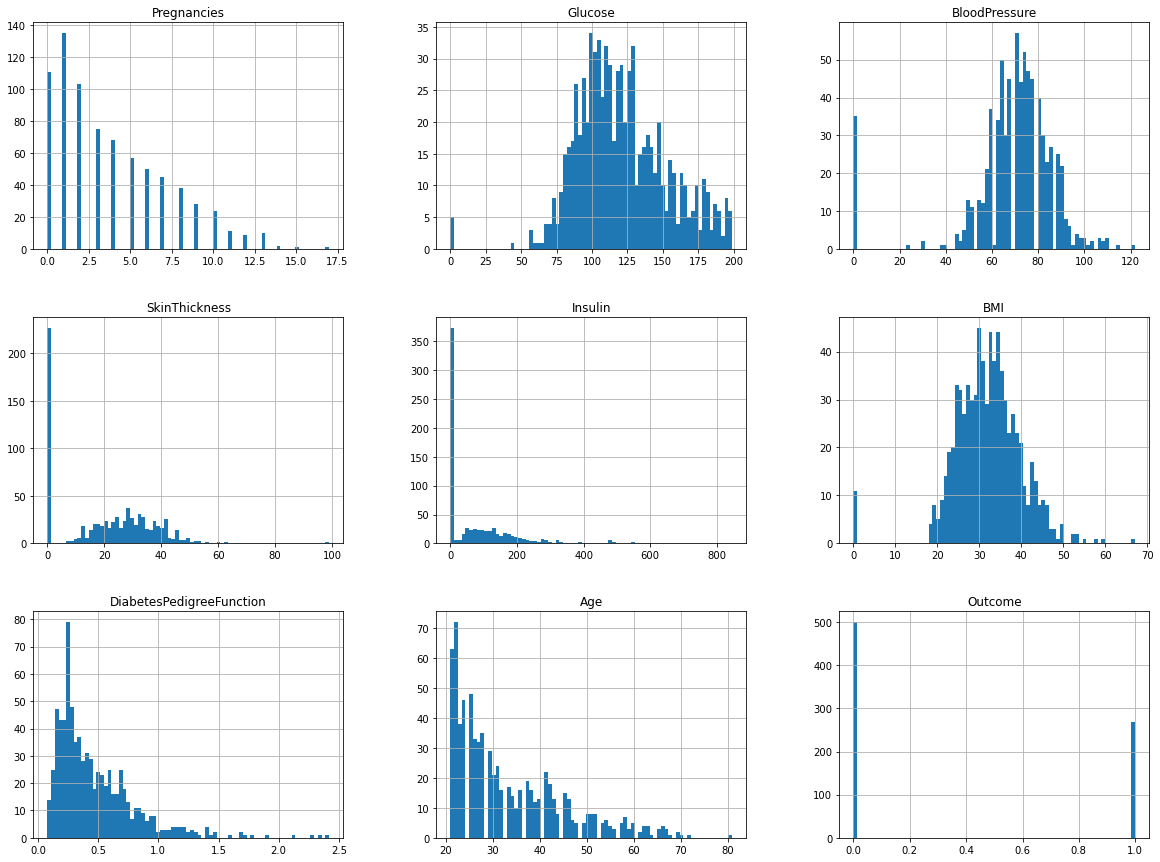

In [15]:
hist_ = eda_diab()
hist_.group_hist(df,X,Y)

To detect outliers, box plot of feaures is visualized. Box plot stratified betweem healthy and sick is shown next.

In [16]:
box_tot = eda_diab()
box_tot.box_plots_tot(X)

In [21]:
box1 = eda_diab()
box1.box_plots_1(X,Y)

### PCA CLUSTERING VISULALIZATION

Features are reduced to two principal components for visualizing the linear/nonlinear separability of the outcome variable 

In [23]:
pca_ = eda_diab()
pca_.pca_viz(df,X,Y)